## Exercises

1. Download boston dataset from eLearn@USM

In [91]:
boston_data <- read.csv("boston.data.csv", sep=",",  stringsAsFactors=TRUE)

2. Load the datase

In [92]:
summary(boston_data)

      CRIM               ZN            INDUS             CHAS       
 Min.   :0.00000   Min.   :  0.0   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.04944   1st Qu.:  0.0   1st Qu.: 3.440   1st Qu.:0.0000  
 Median :0.14466   Median :  0.0   Median : 6.960   Median :0.0000  
 Mean   :1.26920   Mean   : 13.3   Mean   : 9.205   Mean   :0.1408  
 3rd Qu.:0.81962   3rd Qu.: 18.1   3rd Qu.:18.100   3rd Qu.:0.0000  
 Max.   :9.96654   Max.   :100.0   Max.   :27.740   Max.   :1.0000  
                                                                    
      NOX              RM               AGE               DIS        
 Min.   :0.385   Min.   :  3.561   Min.   :  1.137   Min.   : 1.130  
 1st Qu.:0.449   1st Qu.:  5.962   1st Qu.: 32.000   1st Qu.: 2.431  
 Median :0.538   Median :  6.322   Median : 65.250   Median : 3.926  
 Mean   :1.101   Mean   : 15.680   Mean   : 58.745   Mean   : 6.173  
 3rd Qu.:0.647   3rd Qu.:  6.949   3rd Qu.: 89.975   3rd Qu.: 6.332  
 Max.   :7.313   Max.   :100

3. Detect any missing value in the dataset

    - Answer: from the summary of the data we can see there are missing values on `MEDV` column
    


4. Detect any outlier in column DIS using boxplot


In [120]:
library(ggplot2)
library(scales)
library(mgcv)

ERROR: Error in library(mgcv): there is no package called 'mgcv'


In [99]:
class(boston_data$DIS_df)

[1] "data.frame"

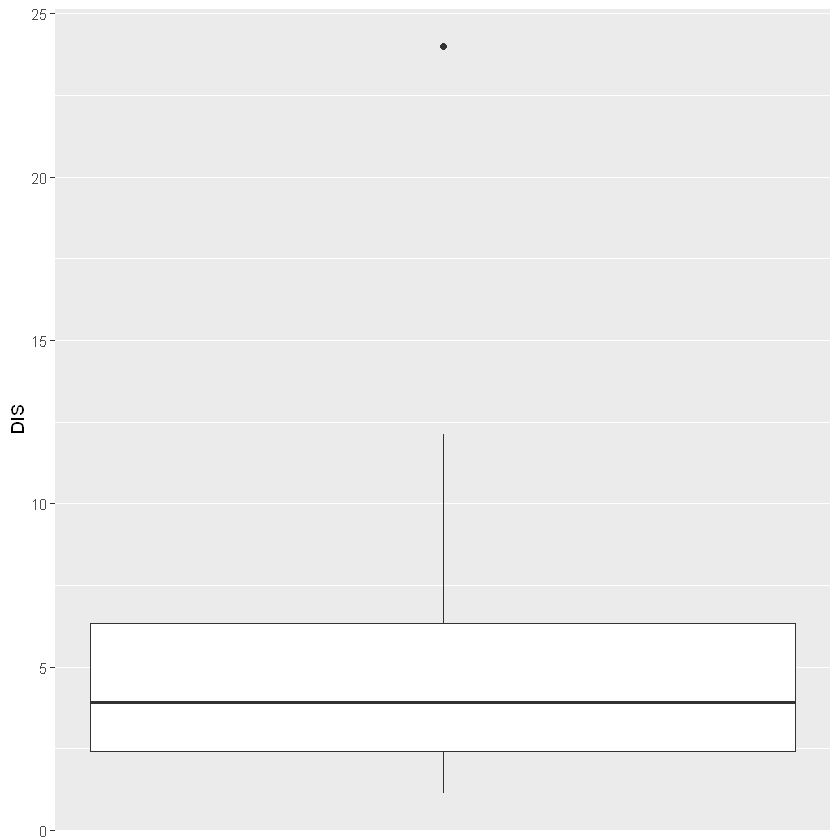

In [115]:
ggplot(boston_data, aes(x=1, y=DIS)) + 
  geom_boxplot() +
  scale_x_continuous(breaks = NULL) + #removes the tick markers from the x axis
  theme(axis.title.x = element_blank())

Answer: As shown by the boxplot above, there is one outlier in DIS column 

5. Write a programming function for IQR rule. The function should accept first quartile and third quartile as arguments and return the lower and upper bounds as a vector. Use the function to detect any outlier in column LSTAT

$$IQR = Q3 - Q1$$


$Q3 : 75^{th}\ percentile$

$Q1 : 25^{th}\ percentile$

In [64]:
# defining and calculating Q1
Q1 <- quantile(boston_data$LSTAT, 0.25)
Q1

25% 
6.8775

In [65]:
# defining and calculating Q3
Q3 <- quantile(boston_data$LSTAT, 0.75)
Q3

75% 
15.015

$$Upper\ bound\ =\ Q3 + (1.5\ x\ IQR)$$
$$Lower\ bound\ =\ Q1 - (1.5\ x\ IQR)$$

In [56]:
iqr_bound <- function(Q1, Q3){
    iqr <- (Q3 - Q1)
    low_bound <- (Q1 - (1.5*iqr))
    up_bound <- (Q3 + (1.5*iqr))
cat(paste("iqr = ", iqr, "\nlower-bound = ", low_bound, 
          "\nupper-bound = ", up_bound))
}

In [55]:
iqr_bound(Q1, Q3)

iqr =  8.1375 
lower-bound =  -5.32875 
upper-bound =  27.22125

6. Examine the relationship between attribute AGE and attribute TAX. Determine if it is a positive or negative correlation or no correlation

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


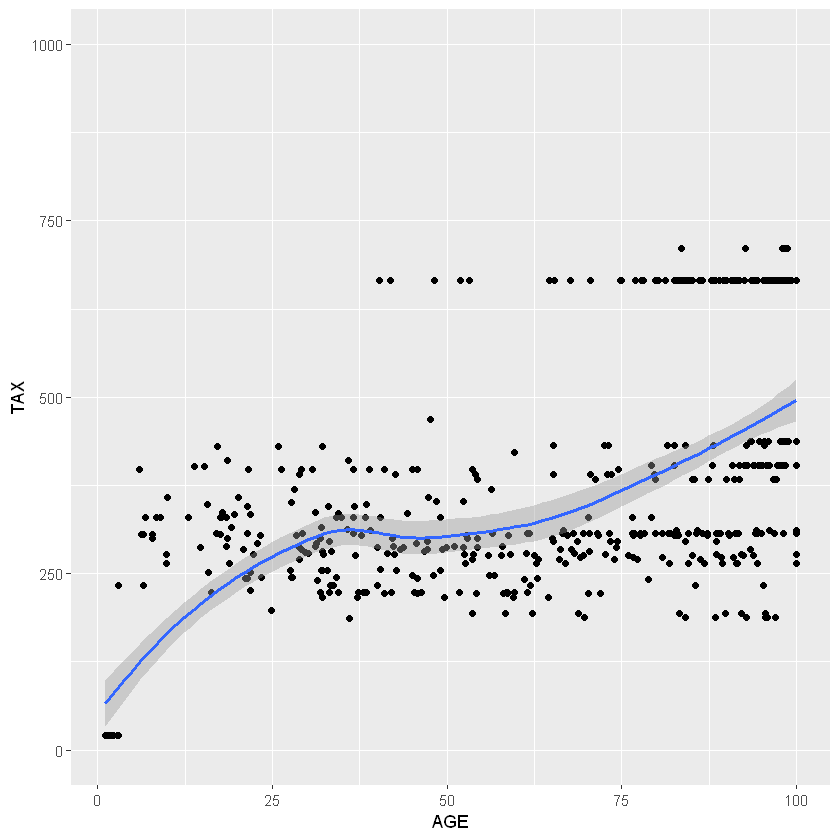

In [134]:
ggplot(boston_data, aes(x=AGE, y=TAX)) + geom_point() + ylim(0, 1000) + geom_smooth()

Answer : There is no clear correlation between attribute AGE and TAX


7. Visualize the relationship between AGE and TAX and fit a linear line through the data. Observe the slope of the linear line

`geom_smooth()` using formula 'y ~ x'


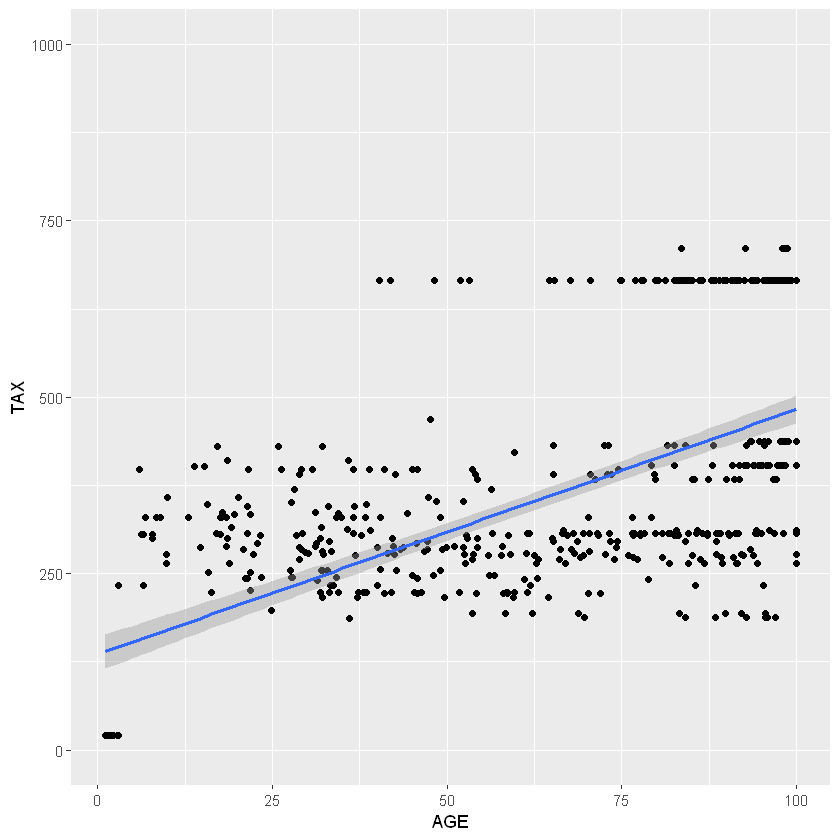

In [130]:
ggplot(boston_data, aes(x=AGE, y=TAX)) + geom_point() + ylim(0,1000) + stat_smooth(method='lm')